In [2]:
import numpy as np
from scipy.spatial import Delaunay

disc = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(disc, disc)
points = np.stack([X, Y], axis=-1).reshape(-1, 2)
elements = Delaunay(points).simplices

In [3]:
from fimjax.util.datastructures import Mesh

mesh = Mesh(points=points, elements=elements)

In [4]:
from fimjax.util.datastructures import InitialValues

initial_values = InitialValues(locations=np.array([0]), values=np.array([0.]))

In [5]:
h = 1 * np.identity(2)
metrics = np.repeat(h[np.newaxis, :, :], mesh.elements.shape[0], axis=0)

In [6]:
from fimjax.main import Solver

solver = Solver()
solution = solver.solve(
    mesh=mesh,
    initial_values=initial_values, metrics=metrics, 
    iter=200
)

In [7]:
solution

FIMSolution(solution=Array([0.        , 0.04081631, 0.08163267, ..., 2.7970386 , 2.8255317 ,
       2.8540294 ], dtype=float32), iterations=Array(200, dtype=int32, weak_type=True), has_converged=Array(True, dtype=bool), has_converged_after=Array(70, dtype=int32, weak_type=True))

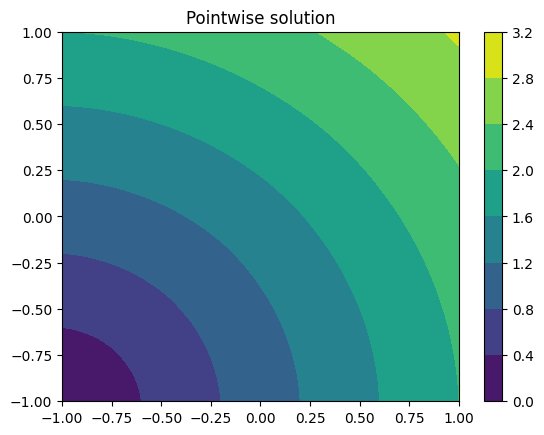

In [14]:
import matplotlib.pyplot as plt

# plt.scatter(mesh.points[:, 0], mesh.points[:, 1], c=solution.solution)


plt.contourf(mesh.points[:, 0].reshape(50,50), mesh.points[:, 1].reshape(50,50),solution.solution.reshape(50,50))
plt.colorbar()
plt.title("Pointwise solution")
plt.show()

In [ ]:
solution, iterations, has_converged, has_converged_after = solution

ValueError: not enough values to unpack (expected 5, got 4)

In [23]:
solution.values()

dict_values([Array([0.        , 0.04081631, 0.08163267, ..., 2.7970386 , 2.8255317 ,
       2.8540294 ], dtype=float32), Array(200, dtype=int32, weak_type=True), Array(True, dtype=bool), Array(70, dtype=int32, weak_type=True)])